In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statistics import mean

from sklearn.model_selection import GridSearchCV, \
    RandomizedSearchCV  # Hyperparameter tuning - GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, \
    KFold  # Cross-validation - StratifiedKFold, RepeatedStratifiedKFold

from sklearn.ensemble import RandomForestClassifier  # Classifier - Random Forest
from sklearn.linear_model import LogisticRegression  # Classifier - Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Classifier - Decision Tree

from sklearn.metrics import roc_auc_score  # Evaluation metric - AUC
from sklearn.metrics import f1_score  # Evaluation metric - F1 score
from sklearn.metrics import accuracy_score  # Evaluation metric - Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Final features:
#feats = [5, 24, 32, 33, 56, 59, 75, 99, 118, 147, 158, 174, 176, 177, 230, 301, 307, 315, 340, 341, 352, 365, 375, 387, 437, 447, 472, 475, 485, 487, 489, 497, 503, 615, 620, 623, 717, 721, 724, 727, 728, 731, 743, 758, 791, 794, 806, 819, 837, 841, 867, 895, 998, 1000, 1015, 1017, 1020, 1022, 1061, 1067, 1251, 1253, 1288, 1301, 1384, 1481, 1597, 1606, 1646, 1649, 1669, 1674, 1687, 1694, 1739, 1973, 2023, 2025, 2026, 2056, 2064, 2154, 2184, 2204, 2214, 2219, 2247, 2411, 2468, 2481, 2482, 2485, 2492, 2496, 2497, 2502, 2656, 2661, 2662, 2669, 2737, 2744, 2762, 2763, 2765, 2770]
feats = [2184,387,489,472,1687,1674,2056,727,1061,728]
hyperparameters = {'criterion': 'gini', 'max_depth': None, 'max_features': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20, 'random_state': 42}

In [3]:
# Data preprocessing

# Load data
data = pd.read_table('Train_call.txt')  # Shows the data with samples as rows, so need to transpose
data = data.T  # Transposes data, so that samples are now rows.
data_target = pd.read_table('Train_clinical.txt')  # Gives sample with associated subgroup

# Extract predictor and target data
target = data_target.loc[:,
         "Subgroup"]  # Isolates the subgroups from samples. We need to convert the subgroups into 0, 1, 2
new_data_unlabeled = data.iloc[4:, :]  # This is the complete cleaned up dataset

# We also need to convert the subgroups into 0, 1, 2
for i in range(len(target)):
    if target[i] == "HER2+":
        target[i] = 0
    elif target[i] == "HR+":
        target[i] = 1
    elif target[i] == "Triple Neg":
        target[i] = 2

# Now split data into train/test set with OPTIMAL features
new_data_unlabeled = new_data_unlabeled.iloc[:, feats]

In [4]:
# Training and performance

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data_unlabeled, target, test_size=0.2,
                                                    random_state=42)
y_train = y_train.astype(int)  # For some reason the numbers are read as strings, so convert to integers

# Train optimal model
rf_classifier = RandomForestClassifier(**hyperparameters)
rf_classifier.fit(X_train, y_train)

# Test performance on test set
y_predict = rf_classifier.predict(X_test)
y_test.reset_index(drop=True, inplace=True)
acc = 0
for i in range(len(y_predict)):
    if y_predict[i] == y_test[i]:
        acc += 1
    print(y_predict[i], y_test[i])
print("Final accuracy:", acc/len(y_predict))

1 1
2 2
0 0
2 2
1 1
0 0
1 1
2 2
1 1
0 0
1 1
2 1
1 1
0 0
1 2
1 2
0 0
1 2
0 0
0 0
Final accuracy: 0.8


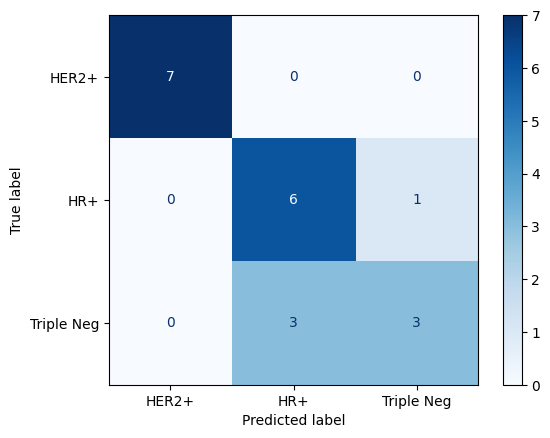

In [5]:
y_true = [y_test[i] for i in range(len(y_test))]
confusion_matrix = confusion_matrix(y_true, y_predict)
cm_graph = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["HER2+", "HR+", "Triple Neg"])

cm_graph.plot(cmap = "Blues")
plt.show()

2184    0.557765
387     0.108574
489     0.068501
1061    0.058468
1674    0.056306
1687    0.053469
727     0.036490
2056    0.030913
472     0.018524
728     0.010992
dtype: float64


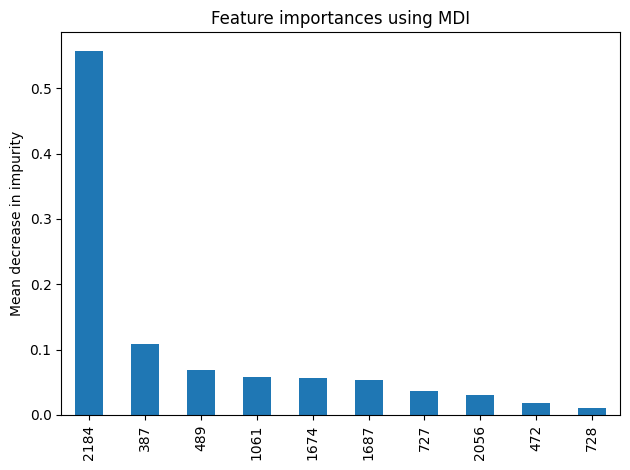

In [6]:
# Feature importance

importance = rf_classifier.feature_importances_
names_features = X_train.columns

# plot feature importance
forest_importances = pd.Series(importance, index=names_features)
sort_forest_importances = forest_importances.sort_values(ascending = False)
top_forest_importances = sort_forest_importances[:10]

print(top_forest_importances)

fig, ax = plt.subplots()
top_forest_importances.plot.bar(ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()